# EDA

# 1. Importar librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar  # Importar el módulo calendar
import warnings 
from wordcloud import WordCloud

# 2. Cargar Datos

In [2]:

# Define los tipos de datos para cada columna excepto para 'fecha'
dtype_dict = {
    'nro_victimas': 'Int64',           # Tipo entero con soporte para NaN (Int64)
    'franja_hora': 'Int64',            # Tipo entero con soporte para NaN (Int64)
    'tipo_calle': 'category',          # Tipo categoría
    'comuna': 'Int64',                 # Tipo entero con soporte para NaN (Int64)
    'vehiculo_victima': 'category',    # Tipo categoría
    'vehiculo_acusado': 'category',    # Tipo categoría
    'sexo': 'category',                # Tipo categoría
    'edad': 'Int64',                   # Tipo entero con soporte para NaN (Int64)
    'gravedad': 'category'             # Tipo categoría
}

# Carga el archivo CSV manteniendo los tipos de datos y categorías
# También indica que la columna 'fecha' debe ser interpretada como una fecha y hora
df_siniestros = pd.read_csv('DataSets/homicidios_cleaned.csv', dtype=dtype_dict, parse_dates=['fecha'])


# 3. Exploramos los datos de los DataFrames: 'homicidios_cleaned' , 'lesiones_cleaned'

In [3]:
df_siniestros.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19,muerte
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70,muerte
2,2016-0003,1,2016-01-03,7,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30,muerte
3,2016-0005,1,2016-01-21,5,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29,muerte
4,2016-0008,1,2016-01-24,18,avenida,8,-58.44451316,-34.68475866,moto,objeto fijo,conductor,masculino,30,muerte


Como vemos con la funcion head aunque solo son 5 resultados aun tenemos valores vacios o NaN

In [4]:
df_siniestros.shape

(644, 14)

Nos indica que nuestros DataFrame cuenta con 28.315 Filas y 15 Columnas

In [5]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      644 non-null    object        
 1   nro_victimas      644 non-null    Int64         
 2   fecha             644 non-null    datetime64[ns]
 3   franja_hora       644 non-null    Int64         
 4   tipo_calle        644 non-null    category      
 5   comuna            644 non-null    Int64         
 6   longitud          644 non-null    object        
 7   latitud           644 non-null    object        
 8   vehiculo_victima  644 non-null    category      
 9   vehiculo_acusado  644 non-null    category      
 10  rol               644 non-null    object        
 11  sexo              644 non-null    category      
 12  edad              644 non-null    Int64         
 13  gravedad          644 non-null    category      
dtypes: Int64(4), category(5), 

Como se logra ver con la funcion info() hay muchas columnas que no llegas al numero de filas indicado

In [6]:
# Obtener el conteo de nulos por columna
null_count = df_siniestros.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df_siniestros.isnull().mean()) * 100

# Formatear los valores
null_info = pd.DataFrame({
    'Nulos': null_count.abs(),  # Tomar solo la parte positiva
    'Porcentaje': null_percentage.round(3)  # Redondear a tres decimales
})

# Agregar una fila adicional para el total
total_nulos = null_info['Nulos'].sum()
total_porcentaje = (total_nulos / (len(df_siniestros) * len(df_siniestros.columns))) * 100

# Formatear el total de nulos y porcentaje
total_nulos_formateado = int(total_nulos)  # Tomar solo la parte entera
total_porcentaje_formateado = round(total_porcentaje, 3)  # Redondear a tres decimales

# Agregar la fila al DataFrame
null_info.loc['Total'] = [total_nulos_formateado, total_porcentaje_formateado]

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro        0.0         0.0
nro_victimas        0.0         0.0
fecha               0.0         0.0
franja_hora         0.0         0.0
tipo_calle          0.0         0.0
comuna              0.0         0.0
longitud            0.0         0.0
latitud             0.0         0.0
vehiculo_victima    0.0         0.0
vehiculo_acusado    0.0         0.0
rol                 0.0         0.0
sexo                0.0         0.0
edad                0.0         0.0
gravedad            0.0         0.0
Total               0.0         0.0


Realizo un conteo por Columna de los valores vacio y el porcentaje por columna , y donde dice Total realice el conteo de todos los valores vacios y el porcentaje total de valores nulos sobre el DataFrame

Decidi no eliminar nulos porque pienso que reduciria considerablemente la cantidad de datos para realizar un buen analisis

In [7]:
# Crear nuevas columnas: dia, semana, mes, semestre, año
df_siniestros['dia'] = df_siniestros['fecha'].dt.day
df_siniestros['semana'] = df_siniestros['fecha'].dt.isocalendar().week
df_siniestros['mes'] = df_siniestros['fecha'].dt.month
df_siniestros['semestre'] = df_siniestros['fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)
df_siniestros['año'] = df_siniestros['fecha'].dt.year


In [8]:
df_siniestros.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,dia,semana,mes,semestre,año
0,2016-0001,1,2016-01-01,4,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19,muerte,1,53,1,1,2016
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70,muerte,2,53,1,1,2016
2,2016-0003,1,2016-01-03,7,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30,muerte,3,53,1,1,2016
3,2016-0005,1,2016-01-21,5,avenida,1,-58.38718297,-34.62246630,moto,pasajeros,conductor,masculino,29,muerte,21,3,1,1,2016
4,2016-0008,1,2016-01-24,18,avenida,8,-58.44451316,-34.68475866,moto,objeto fijo,conductor,masculino,30,muerte,24,3,1,1,2016


Divido la columna fecha en diferentes columnas para poder aplicar la funcion describe y analizar los datos de forma numerica y no como un datatime

In [9]:
# Seleccionar las columnas específicas
columnas_seleccionadas = ['nro_victimas', 'franja_hora', 'comuna', 'edad','dia', 'semana', 'mes', 'semestre','año']

# Obtener el resumen estadístico para las columnas seleccionadas
resumen_estadistico = df_siniestros[columnas_seleccionadas].describe()

# Imprimir el resumen estadístico
resumen_estadistico

,nro_victimas,franja_hora,comuna,edad,dia,semana,mes,semestre,año
count,644.0,644.0,644.0,644.0,644.000000,644.0,644.000000,644.000000,644.000000
mean,1.060559,11.690994,7.402174,42.17236,15.922360,27.546584,6.704969,1.517081,2018.223602
std,0.25751,6.639753,4.382,19.827399,8.654606,15.644356,3.583690,0.500097,1.674900
min,1.0,0.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,2016.000000
25%,1.0,6.0,4.0,27.0,9.000000,14.0,4.000000,1.000000,2017.000000
50%,1.0,11.0,8.0,37.0,16.000000,28.0,7.000000,2.000000,2018.000000
75%,1.0,18.0,11.0,56.0,23.000000,42.0,10.000000,2.000000,2020.000000
max,3.0,23.0,15.0,95.0,31.000000,53.0,12.000000,2.000000,2021.000000


Número de Víctimas:
El promedio de víctimas por siniestro es aproximadamente 1.06 y la desviación estándar es de aproximadamente 0.26, lo que dice que hay poca variabilidad en el número de víctimas.

Franja Horaria:
El promedio de la franja horaria es aproximadamente 11.69 y su desviación estándar es de aproximadamente 6.64, lo que indica una mayor variabilidad en las horas en que ocurren los siniestros.

Edad:
La edad promedio de las personas involucradas en los siniestros es de aproximadamente 42.17 años.
La desviación estándar es de aproximadamente 19.83, lo que sugiere una amplia dispersión en las edades.

El promedio del semestre es aproximadamente 1.52, lo que indica que los siniestros están distribuidos en ambos semestres del año.
Año (año):
El promedio del año es aproximadamente 2018, lo que sugiere que ahi a pasado una gran mayoria  de accidentes fatales

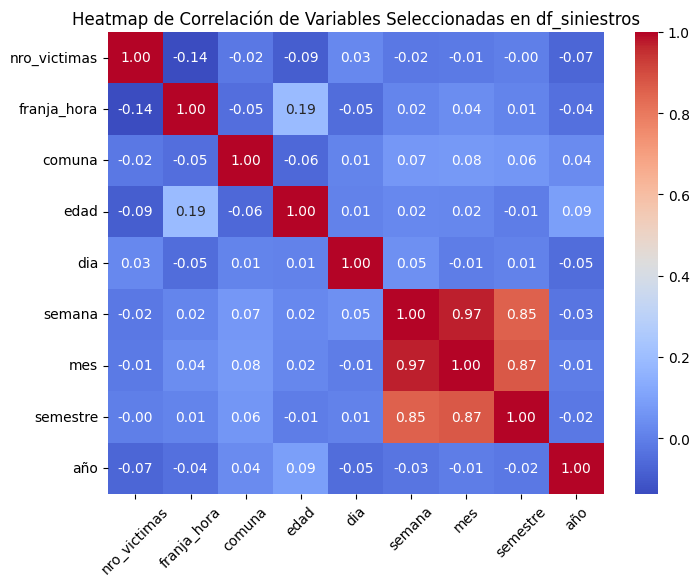

In [10]:
# Calcula la matriz de correlación solo para esas columnas
correlation_matrix = df_siniestros[columnas_seleccionadas].corr()

# Crea el heatmap
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Crear el heatmap
plt.title('Heatmap de Correlación de Variables Seleccionadas en df_siniestros')  # Título del heatmap
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.yticks(rotation=0)  # No rotar las etiquetas del eje y
plt.show()

Correlaciones Positivas:
Número de Víctimas muestra una correlación positiva con la Franja Horaria . Esto podría indicar que ciertas horas del día están asociadas con más víctimas en los siniestros.Así mismo Edad tiene una correlación positiva con el Mes. Esto podría sugerir que ciertas edades están más involucradas en siniestros en ciertos meses. Tamboen Semestre y Año también muestran correlaciones positivas con otras variables, lo que podría indicar patrones estacionales o tendencias a lo largo del tiempo.

Correlaciones Negativas:
Comuna tiene una correlación negativa con la Franja Horaria. Esto podría significar que diferentes áreas geográficas experimentan siniestros en momentos distintos del día. Mientras que Día muestra una correlación negativa con la Semana. Esto podría indicar que ciertos días de la semana están asociados con menos siniestros.

## Outliers

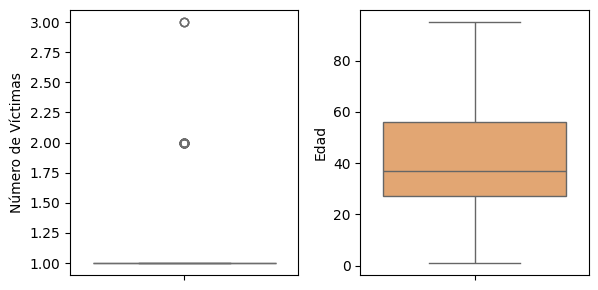

In [11]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(6, 3))

# Crear subplots para los gráficos 
plt.subplot(1, 2, 1) 
sns.boxplot(data=df_siniestros, y='nro_victimas', color="#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 2, 2) 
sns.boxplot(data=df_siniestros, y='edad', color="#F4A460")
plt.ylabel('Edad')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

El gráfico de dispersión:
Muestra tres puntos de datos. donde por media y desviasion estadar visto en el Describe() se puede ver que la mayoria de accidentes dejan un fallecido, muy excaso 2 o 3 que los tomamos con outliers

El gráfico de caja:
Nos muestra una concentración principal de edades que al parecer estan entre aproximadamente 35 y 60 años.
Hay unos valores superior que se extiende cerca de los 80 años y unos valores inferior que se acerca a los 2 años, lo que indica variabilidad en las edades.



C:\Users\U ANGEL\AppData\Local\Temp\ipykernel_13544\4275420704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=frecuencia_comuna.index, y=frecuencia_comuna.values, palette='pastel')


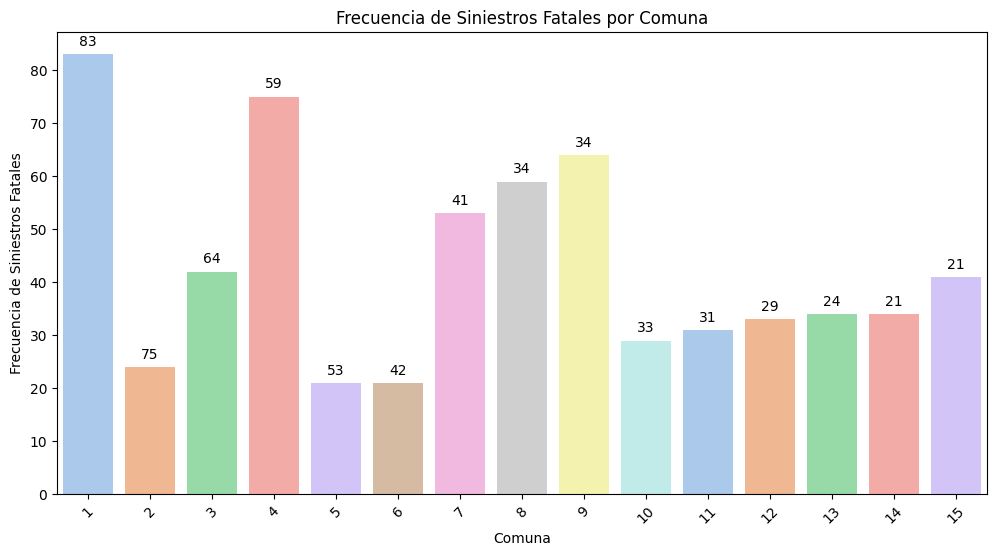

In [24]:
# Calcular la frecuencia de siniestros fatales por comuna
frecuencia_comuna = df_siniestros['comuna'].value_counts()

# Ordenar las comunas por frecuencia de siniestros fatales de mayor a menor
frecuencia_comuna = frecuencia_comuna.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=frecuencia_comuna.index, y=frecuencia_comuna.values, palette='pastel')
plt.title('Frecuencia de Siniestros Fatales por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia de Siniestros Fatales')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Añadir el valor de la frecuencia encima de cada barra
for bar, valor in zip(bars.patches, frecuencia_comuna):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, valor, ha='center', va='bottom')
    
# Mostrar el gráfico
plt.show()

En la Comuna 1 tiene 83 incidentes, es la comuna con la mayor cantidad de siniestros fatales. Esto podría indicar que esta área enfrenta desafíos significativos en términos de seguridad vial o emergencias, mientras que la Comunas 2, 3 y 4, estas comunas también tienen una frecuencia considerable de incidentes fatales. Asi mismo las Comunas 14 y 15 son las comunas con la menor cantidad de siniestros fatales. 

C:\Users\U ANGEL\AppData\Local\Temp\ipykernel_13544\153895376.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, valor + 1, f'{porcentaje_por_tipo_calle[i]:.1f}%', ha='center', va='bottom')


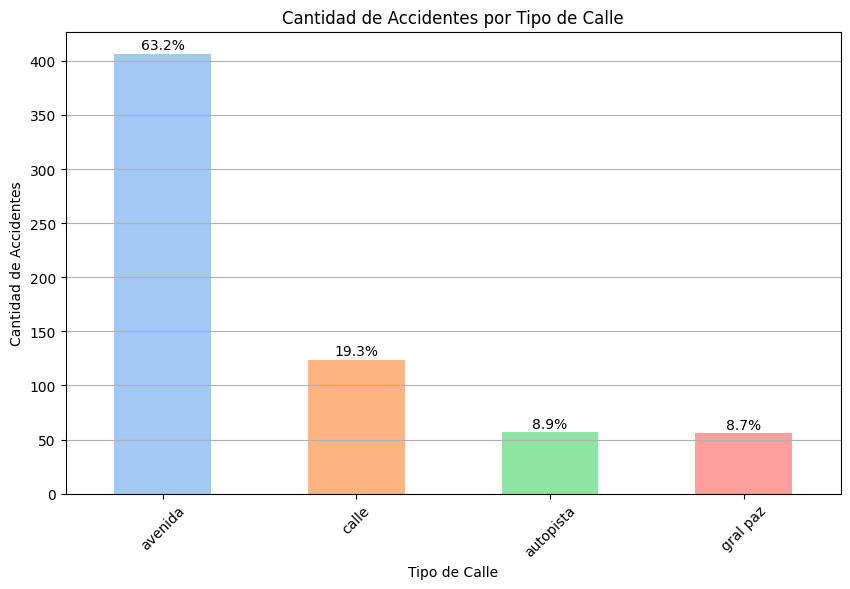

In [13]:
# Calcular la cantidad de accidentes por tipo de calle
accidentes_por_tipo_calle = df_siniestros['tipo_calle'].value_counts()

# Ordenar las frecuencias de accidentes de mayor a menor
accidentes_por_tipo_calle = accidentes_por_tipo_calle.sort_values(ascending=False)

# Calcular el porcentaje de cada tipo de calle
total_accidentes = accidentes_por_tipo_calle.sum()
porcentaje_por_tipo_calle = (accidentes_por_tipo_calle / total_accidentes) * 100

# Crear una paleta de colores
colores = sns.color_palette('pastel', len(accidentes_por_tipo_calle))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = accidentes_por_tipo_calle.plot(kind='bar', color=colores)
plt.title('Cantidad de Accidentes por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')  # Mostrar la cuadrícula en el eje y para facilitar la lectura

# Añadir los porcentajes encima de las barras
for i, valor in enumerate(accidentes_por_tipo_calle):
    plt.text(i, valor + 1, f'{porcentaje_por_tipo_calle[i]:.1f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


Como vemos en el grafico las avenidas son las más peligrosas en términos de accidentes. Esto podría deberse a su mayor tráfico, cruces de peatones o condiciones de la vía. Mientas que las calles también tienen una frecuencia considerable de accidentes, lo que sugiere que no debemos subestimar su riesgo. Pero las autopistas tienen menos accidentes, posiblemente debido a su diseño y regulaciones de velocidad. Asi mismo general paz también presentan un riesgo significativo, aunque suelen ser áreas más pequeñas, pero muy concurrido

C:\Users\U ANGEL\AppData\Local\Temp\ipykernel_13544\3330284322.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=victimas_por_año.index, y=victimas_por_año.values, palette=colores)


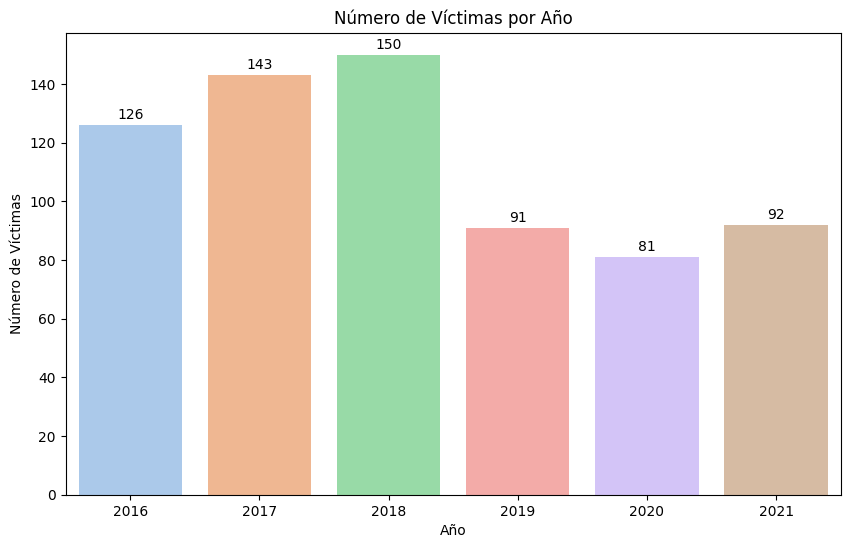

In [14]:
# Agrupar los datos por año y calcular la suma de víctimas para cada año
victimas_por_año = df_siniestros.groupby('año')['nro_victimas'].sum()

# Crear una paleta de colores
colores = sns.color_palette('pastel', len(victimas_por_año))

# Crear el gráfico de barras con colores diferentes para cada barra
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=victimas_por_año.index, y=victimas_por_año.values, palette=colores)
plt.title('Número de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')

# Añadir el valor de la frecuencia encima de cada barra
for bar, valor in zip(bars.patches, victimas_por_año):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, valor, ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

El año 2018 fue crítico en términos de seguridad vial, con un alto número de víctimas. Pero el 2019 parece(covid) haber tenido un impacto positivo al reducir la cantidad de víctimas.
La tendencia a la baja continuó en 2020 debido que recien estabamos volviendo a realizar las actividades, aunque con una disminución más moderada. Pero el 2021 muestra una pequeña reversión en la tendencia, pero aún está por debajo del pico de 2018.

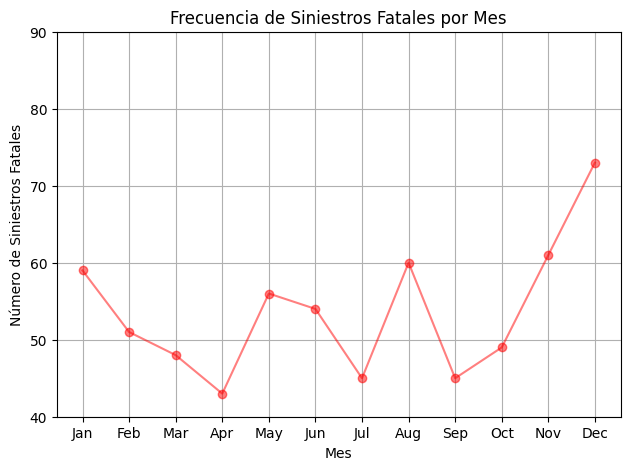

In [15]:
# Agrupar por mes y contar el número de siniestros en cada mes
siniestros_fatal_por_mes = df_siniestros.groupby(df_siniestros['mes']).size()

# Crear dos gráficos diferentes
plt.figure(figsize=(16, 5))

# Primer gráfico para siniestros fatales por mes
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_mes.index, siniestros_fatal_por_mes, label='Fatal', marker='o', alpha=0.5, color='red')
plt.title('Frecuencia de Siniestros Fatales por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros Fatales')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(40, 90)  # Ajustar el rango del eje y
plt.grid(True)

Agosto y Enero podría estar relacionado con factores como el clima, festividades o mayor tráfico.
Diciembre podría verse afectado por las festividades, condiciones climáticas o mayor actividad en las calles.

C:\Users\U ANGEL\AppData\Local\Temp\ipykernel_13544\1838617095.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categoria tiempo', y='Cantidad accidentes', data=data, palette='muted')


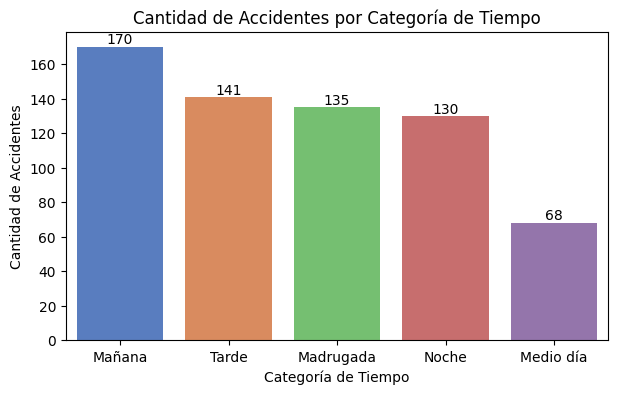

In [16]:
def determinar_franja_horaria(franja_hora):
    if franja_hora >= 6 and franja_hora <= 10:
        return "Mañana"
    elif franja_hora >= 11 and franja_hora <= 13:
        return "Medio día"
    elif franja_hora >= 14 and franja_hora <= 18:
        return "Tarde"
    elif franja_hora >= 19 and franja_hora <= 23:
        return "Noche"
    else:
        return "Madrugada"

# Aplicar la función para crear la columna 'Categoria tiempo'
df_siniestros['Categoria tiempo'] = df_siniestros['franja_hora'].apply(determinar_franja_horaria)

# Contar la cantidad de accidentes por categoría de tiempo
data = df_siniestros['Categoria tiempo'].value_counts().reset_index()
data.columns = ['Categoria tiempo', 'Cantidad accidentes']

# Calcular los porcentajes
total_accidentes = data['Cantidad accidentes'].sum()
data['Porcentaje'] = (data['Cantidad accidentes'] / total_accidentes) * 100

# Se crea el gráfico de barras con una paleta de colores
plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Categoria tiempo', y='Cantidad accidentes', data=data, palette='muted')

ax.set_title('Cantidad de Accidentes por Categoría de Tiempo')
ax.set_xlabel('Categoría de Tiempo')
ax.set_ylabel('Cantidad de Accidentes')

# Se agrega las cantidades en las barras
for index, row in data.iterrows():
    ax.annotate(f'{row["Cantidad accidentes"]}', (index, row["Cantidad accidentes"]), ha='center', va='bottom')

# Se muestra el gráfico
plt.show()

Se pueden apreciar que el mayor porcentaje de los accidentes ocurren durante la mañana, donde la actividad laboral y asistencia a los colegios es alta. En el mediodía se registra un porcentaje considerablemente menor de cantidad de accidentes fatales respecto a los otros momentos del día.
En la tarde tambien se puede apreciar que ocurre muchos accidentes debido a la salida y regreso a casa de la actividad laboral y de los colegios

C:\Users\U ANGEL\AppData\Local\Temp\ipykernel_13544\2403991333.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, palette=custom_palette)


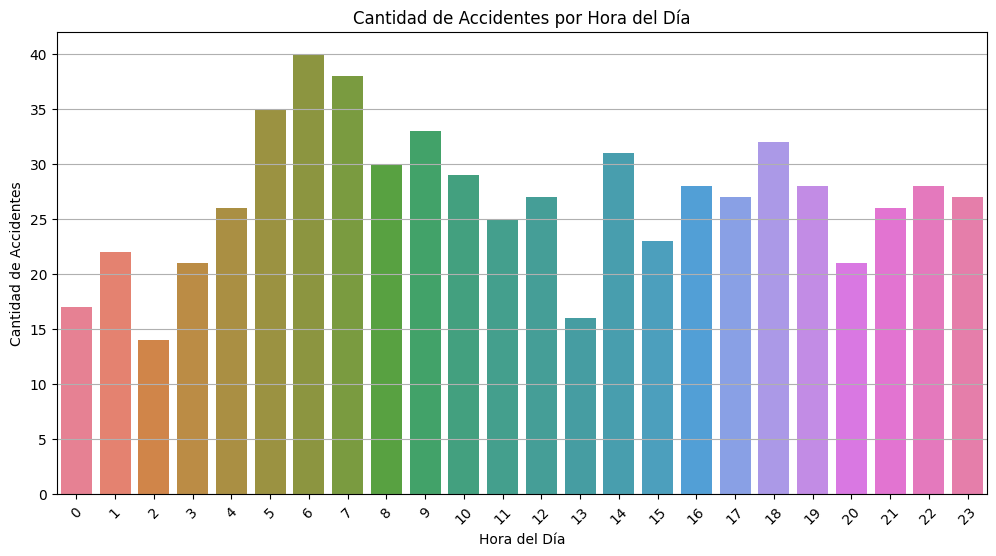

In [17]:
# Calcular la cantidad de accidentes por hora del día
accidentes_por_hora = df_siniestros['franja_hora'].value_counts().sort_index()

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("husl", len(accidentes_por_hora))

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
sns.barplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, palette=custom_palette)
plt.title('Cantidad de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')  # Mostrar la cuadrícula en el eje y para facilitar la lectura

# Mostrar el gráfico
plt.show()

Con mas detalle, observando hora a hora la distribución de los accidentes, es posible identificar el horario entre las 5 a las 9 de la mañana como el de mayor cantidad de accidentes. Luego se observa un poco a las 10 de la mañana seguido de tres momentos puntuales como lo son las 14 hs, las 18 hs y las 22 hs.